**PARA ESTIMAR EL PRECIO DE LOS DIAMANTES, PRIMERO NECESITAMOS PREPARAR LA DATA**

**IMPORTAMOS LIBRERIAS**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_context('poster')
sns.set(rc={'figure.figsize': (12., 10.)})
sns.set_style('whitegrid')

**IMPORTAMOS CSV**

In [2]:
df_train = pd.read_csv("../Data/train.csv", index_col = 0)
df_test = pd.read_csv("../Data/test.csv", index_col = 0)

**A VER QUE TENEMOS...**

In [3]:
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692
2,0.84,Ideal,G,VS1,61.4,56.0,6.04,6.15,3.74,4372
3,1.55,Ideal,H,VS1,62.0,57.0,7.37,7.43,4.59,13665
4,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66,422


In [4]:
df_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
df_train.isna().sum() 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
cut = df_train["cut"].value_counts()
color = df_train["color"].value_counts()
clarity = df_train["clarity"].value_counts()

<AxesSubplot:>

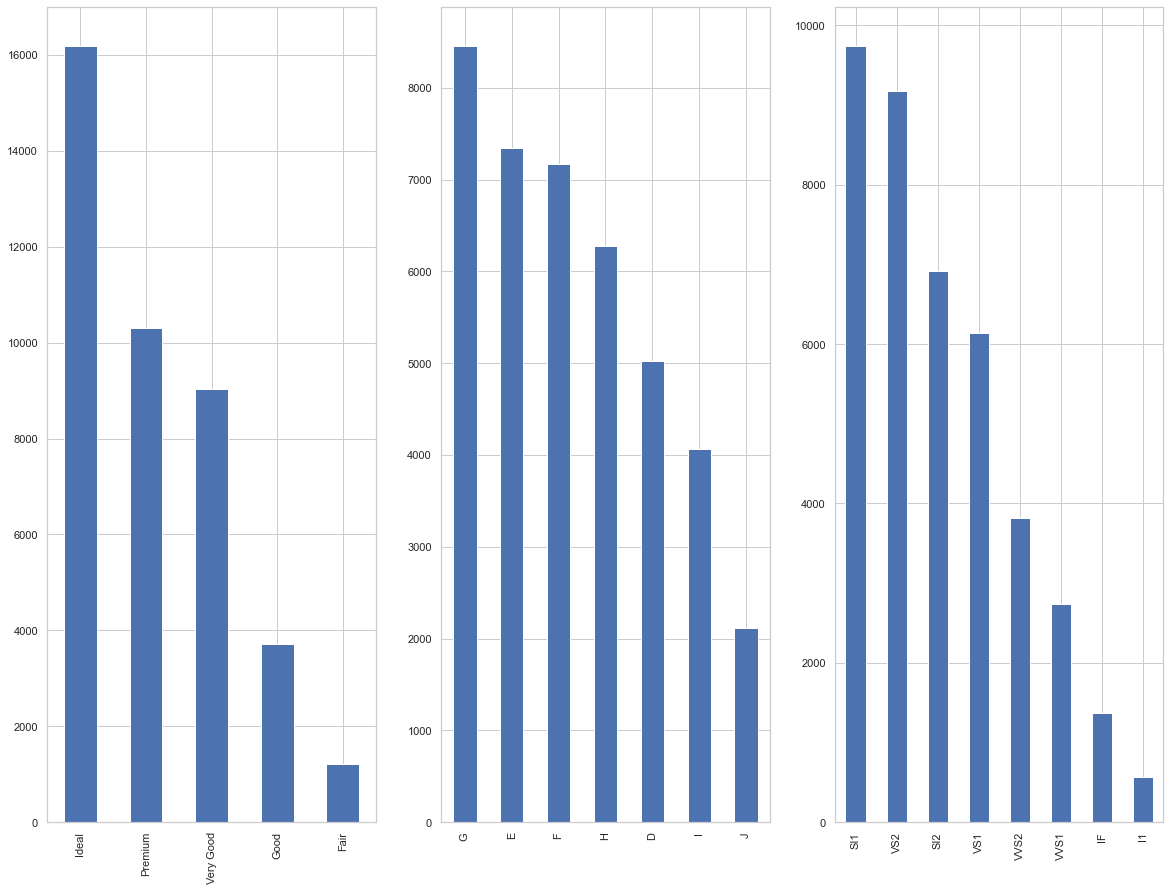

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,15))
cut.plot.bar(ax=axs[0])
color.plot.bar(ax=axs[1])
clarity.plot.bar(ax=axs[2])

**VAMOS A LIMPIAR LA DATA**

**VEAMOS CORRELACIONES**

In [30]:
x = df_train.corr().round(2)
x

,carat,cut,color,clarity,depth,table,price
carat,1.00,-0.13,-0.29,-0.35,0.03,0.18,0.92
cut,-0.13,1.00,0.02,0.19,-0.22,-0.43,-0.05
color,-0.29,0.02,1.00,-0.03,-0.05,-0.02,-0.17
clarity,-0.35,0.19,-0.03,1.00,-0.07,-0.16,-0.15
depth,0.03,-0.22,-0.05,-0.07,1.00,-0.30,-0.02
table,0.18,-0.43,-0.02,-0.16,-0.30,1.00,0.13
price,0.92,-0.05,-0.17,-0.15,-0.02,0.13,1.00


**BUSCAMOS COLINEALIDAD MEDIANTE UN HEATMAP**

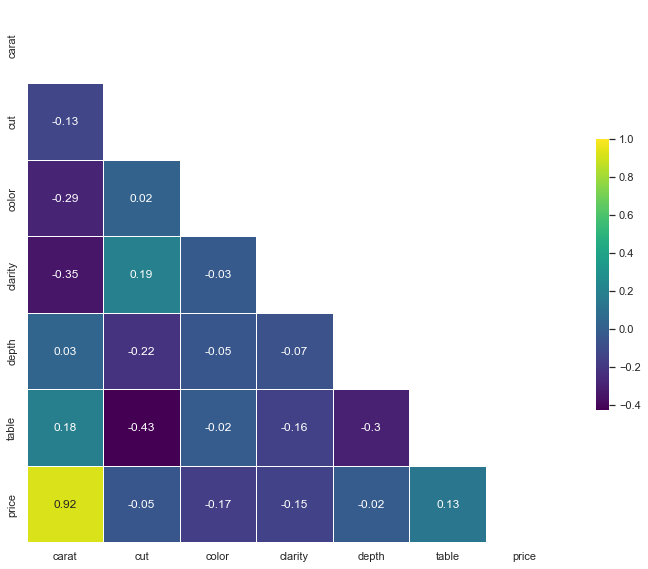

In [31]:
maskk = np.triu(np.ones_like(x, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(x,  
            mask = maskk,
            cmap='viridis',
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5}, 
            annot = True);

**ENCONTRAMOS UNA COLINEALIDAD ALTÍSIMA ENTRE LOS QUILATES - X,Y,Z.**       
**HACEMOS DROP DE LAS TRES, UNA POR UNA PARA VER SI PERDEMOS ALGUNA INFORMACIÓN VALIOSA**

In [10]:
x = x.drop("x", axis = 0)
x = x.drop("x", axis = 1)

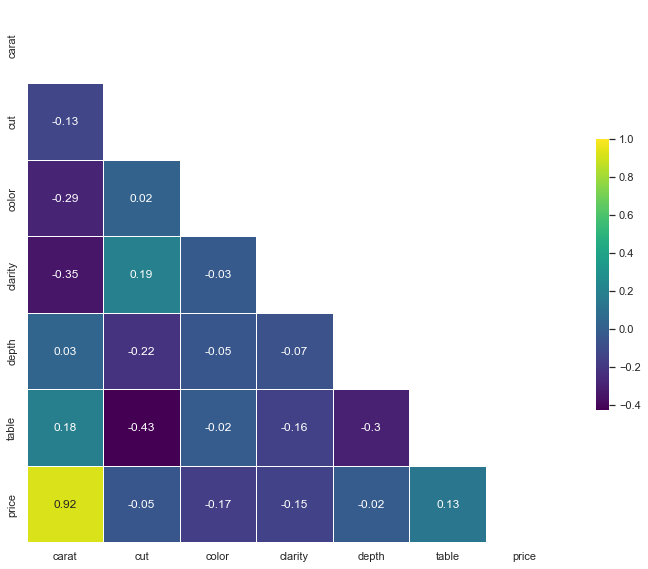

In [32]:
maskk = np.triu(np.ones_like(x, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(x,  
            mask = maskk,
            cmap='viridis',
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5}, 
            annot = True);

In [12]:
x = x.drop("y", axis = 1)
x = x.drop("y", axis = 0)

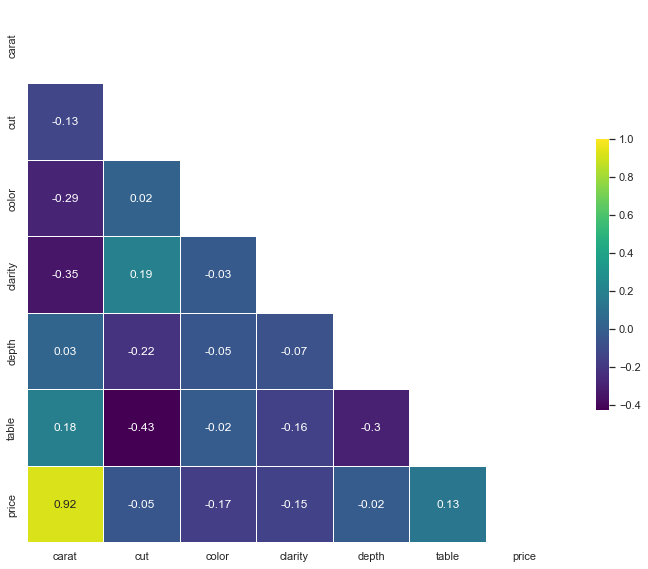

In [33]:
maskk = np.triu(np.ones_like(x, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(x,  
            mask = maskk,
            cmap='viridis',
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5}, 
            annot = True);

In [14]:
x = x.drop("z", axis = 1)
x = x.drop("z", axis = 0)

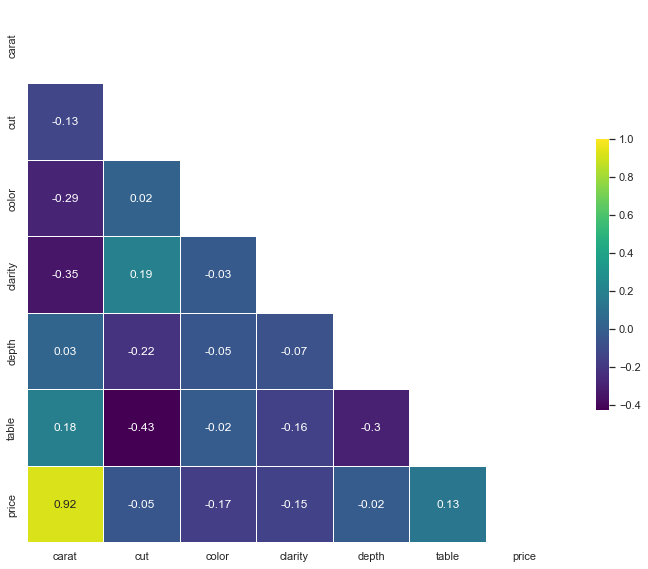

In [34]:
maskk = np.triu(np.ones_like(x, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(x,  
            mask = maskk,
            cmap='viridis',
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5}, 
            annot = True);

In [16]:
df_train.drop(['x', 'y', 'z'], axis = 1, inplace=True)
df_train.sample(3)

,carat,cut,color,clarity,depth,table,price
id,,,,,,,
39061,1.13,Ideal,F,SI2,60.4,56.0,4449
21327,0.31,Ideal,G,VVS2,61.2,54.0,677
14462,2.02,Very Good,G,SI2,63.3,57.0,9853


**SABEMOS QUE OCURRE LO MISMO CON TEST DF... LO CAMBIAMOS**

In [17]:
df_test.drop(['x', 'y', 'z'], axis = 1, inplace=True)
df_test.sample(3)

,carat,cut,color,clarity,depth,table
id,,,,,,
10595,1.01,Good,D,SI1,58.4,62.0
9534,0.30,Ideal,I,VS1,62.4,54.0
3199,0.25,Very Good,E,VVS2,62.7,59.0


**CUT / COLOR / CLARITY PARECEN ESTAR RANKEADAS, PODRÍAMOS O BIEN DARLES UN VALOR O HACER UN LABEL_ENCODER**

**CREAMOS UN DICCIONARIO CON LOS VALORES**

In [18]:
dicc_cut = {"Ideal":5 ,"Premium":4 ,"Very Good":3 ,"Good":2 ,"Fair":1}
dicc_color = {"G":4 ,"E":6 ,"F":5 ,"H":3 ,"D":7 ,"I":2 ,"J":1 }
dicc_clarity = {"SI1":3 ,"VS2":4 ,"SI2":2 ,"VS1":5 ,"VVS2":6 ,"VVS1":7 ,"IF":8 ,"I1":1 }

**HACEMOS USO DE MAP PARA DARLES ESTOS VALORES EN TRAIN**

In [19]:
df_train.cut = df_train.cut.map(dicc_cut)

In [20]:
df_train.color = df_train.color.map(dicc_color)

In [21]:
df_train.clarity = df_train.clarity.map(dicc_clarity)

In [22]:
df_train.sample(3)

,carat,cut,color,clarity,depth,table,price
id,,,,,,,
39917,0.60,3,6,5,60.0,58.0,2270
35893,0.32,3,7,2,62.8,57.0,477
9624,0.55,3,5,3,60.5,59.0,1370


**HACEMOS LO MISMO PARA DARLES ESTOS VALORES EN TEST**

In [23]:
df_test.cut = df_test.cut.map(dicc_cut)

In [24]:
df_test.color = df_test.color.map(dicc_color)

In [25]:
df_test.clarity = df_test.clarity.map(dicc_clarity)

In [26]:
df_test.sample(3)

,carat,cut,color,clarity,depth,table
id,,,,,,
11500,0.93,5,6,2,60.5,54.0
9535,0.90,3,3,4,63.3,59.0
9142,2.02,5,4,2,63.5,54.0


**EXPORTAMOS LOS DOS CSV LIMPIOS Y LISTOS PARA APLICAR MACHINE LEARNING**

In [29]:
df_train.to_csv("../Data/train_c.csv")
df_test.to_csv("../Data/test_c.csv")